In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('C:\Adhrit_066\Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
X = df.drop(labels=["Purchased"], axis=1)
y = df["Purchased"]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((320, 2), (80, 2), (320,), (80,))

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)  

LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8875

		Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.82      0.85      0.84        27

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



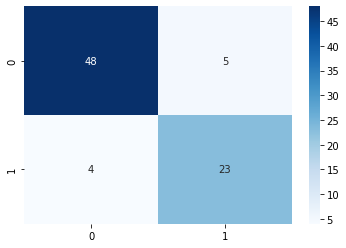

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

ROC AUC Score: 0.8787561146051713


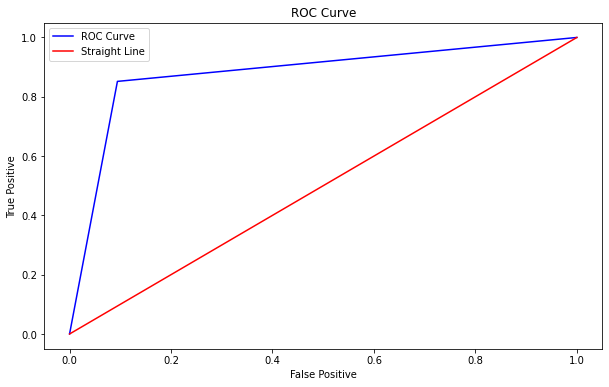

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [14]:
# Batch Gradient Descent
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient Descent 
def batch_gradient_descent(X, y, epochs=20, lr=0.1):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta -= lr*gradient
        loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, theta)
y_pred_batch = [int(i) for i in y_pred_batch]

Loss after epoch 1: 0.6931471805599467
Loss after epoch 2: 0.6487732277316449
Loss after epoch 3: 0.6099953161456839
Loss after epoch 4: 0.576555252873191
Loss after epoch 5: 0.5480677165393487
Loss after epoch 6: 0.5240709076274015
Loss after epoch 7: 0.5040742706725293
Loss after epoch 8: 0.4875952068028898
Loss after epoch 9: 0.47418276108869895
Loss after epoch 10: 0.4634300550634894
Loss after epoch 11: 0.45438835621752416
Loss after epoch 12: 0.4469751379418769
Loss after epoch 13: 0.4402114831095935
Loss after epoch 14: 0.43460294302157676
Loss after epoch 15: 0.43006822080795254
Loss after epoch 16: 0.42669244898343395
Loss after epoch 17: 0.4237294330411463
Loss after epoch 18: 0.4216252709263218
Loss after epoch 19: 0.420318515800032
Loss after epoch 20: 0.4195767756665528


In [15]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_batch)}")

Accuracy: 0.825

		Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        53
           1       0.67      0.96      0.79        27

    accuracy                           0.82        80
   macro avg       0.82      0.86      0.82        80
weighted avg       0.87      0.82      0.83        80



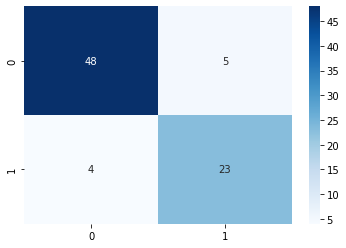

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()


ROC AUC Score: 0.8588399720475192


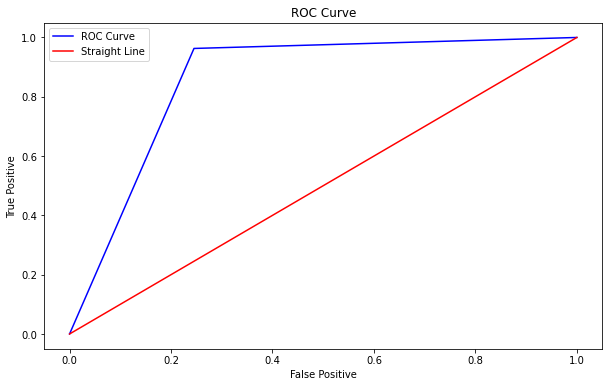

In [17]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_batch)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [18]:
y_train = y_train.values

In [19]:
# SGD
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Stochastic Gradient Descent 
def stochastic_gradient_descent(X, y, epochs=10, lr=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss = 0
        for i in range(m):
            Xi = X[i, :]
            yi = y[i]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/m}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = stochastic_gradient_descent(X_train, y_train)
y_pred_sgd = predict(X_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]

Loss after epoch 1: 0.581954234735165
Loss after epoch 2: 0.4861059955804793
Loss after epoch 3: 0.45491152872503215
Loss after epoch 4: 0.4407877861811148
Loss after epoch 5: 0.4332528202792435
Loss after epoch 6: 0.42883235418522964
Loss after epoch 7: 0.42607477841618574
Loss after epoch 8: 0.42427953671533347
Loss after epoch 9: 0.4230737665825658
Loss after epoch 10: 0.422244526752053


In [20]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_sgd)}")


Accuracy: 0.825

		Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        53
           1       0.67      0.96      0.79        27

    accuracy                           0.82        80
   macro avg       0.82      0.86      0.82        80
weighted avg       0.87      0.82      0.83        80



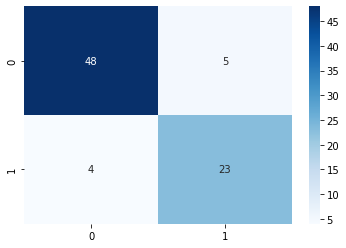

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

ROC AUC Score: 0.8588399720475192


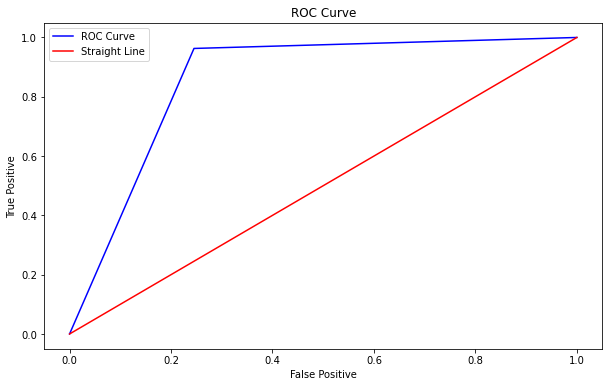

In [24]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_sgd)

# AUC Score
auc = roc_auc_score(y_test, y_pred_sgd)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [25]:
# Mini Batch Gradient Descent
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Gradient Descent 
def mini_batch_gradient_descent(X, y, epochs=15, lr=0.01, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss=0
        for batch in range(1,(X.shape[0]//batch_size)+1):
            Xi = X[batch_size*(batch-1):batch_size*batch, :]
            yi = y[batch_size*(batch-1):batch_size*batch]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))//m
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/10}")
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

theta = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, theta)
y_pred_mini_batch = [int(i) for i in y_pred_mini_batch]

Loss after epoch 1: 0.672595987061001
Loss after epoch 2: 0.630819240114579
Loss after epoch 3: 0.5945286009349161
Loss after epoch 4: 0.5634021962798672
Loss after epoch 5: 0.5374071187255611
Loss after epoch 6: 0.516538499202122
Loss after epoch 7: 0.49891881013659134
Loss after epoch 8: 0.48385995030758727
Loss after epoch 9: 0.4710832582129278
Loss after epoch 10: 0.46033260732252135
Loss after epoch 11: 0.45156321539030275
Loss after epoch 12: 0.4448635943547714
Loss after epoch 13: 0.43920667888815235
Loss after epoch 14: 0.4344924204954886
Loss after epoch 15: 0.4306317669235595


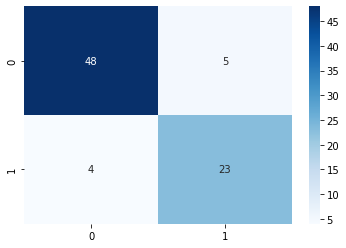

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_mini_batch)}\n")
print(f"Precision: {precision_score(y_test, y_pred_mini_batch)}\n")
print(f"Recall: {recall_score(y_test, y_pred_mini_batch)}\n")
print(f"F1-score: {f1_score(y_test, y_pred_mini_batch)}\n")


Accuracy: 0.8375

Precision: 0.6842105263157895

Recall: 0.9629629629629629

F1-score: 0.7999999999999999



ROC AUC Score: 0.8682739343116702


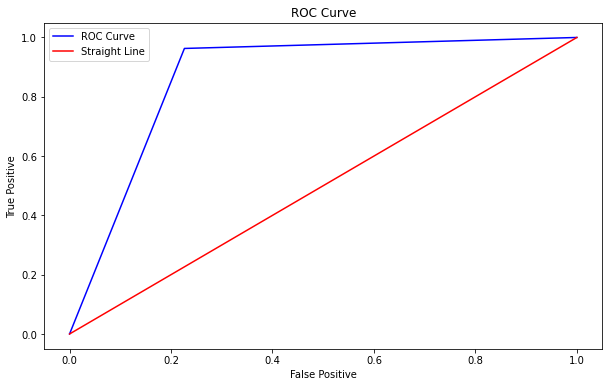

In [28]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_mini_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_mini_batch)
print(f"ROC AUC Score: {auc}")

# Plot curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()